In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# COnfiguro estilo y paleta de colores de las graficas para tener un patron de presentacion
sns.set_style('dark')
sns.set_palette('viridis')
%matplotlib inline

In [3]:
def data_type_process(file):
    
    # Carga datos
    data = pd.read_excel(file, sheet_name='Bd')
    
    # Cambio tipo de variable en id
    data['id'] = data['id'].astype('int64')
    
    # Definir el diccionario de mapeo de categorías a valores numéricos
    mapeo_estado = {'SUSPENSION ESPECIAL': 1, 'ACTIVO': 2, 'NO RENOVO': 3, 'SUSPENDE': 4}
    # Aplicar el mapeo a la columna 'estado'
    data['estado'] = data['estado'].map(mapeo_estado)
    data['estado'] = data['estado'].astype('category')

    # Cambio de tipo de variable objeto a numerico en columna promedio acumulado
    data['promedio_academico_acumulado'] = pd.to_numeric(data['promedio_academico_acumulado'], errors='coerce')
    # Cambio tipo de variable de numerico a category (variable a predecir)
    data['desertor'] = data['desertor'].astype('category')

    return data

# Analisis Exploratorio de Datos (EDA)

In [4]:
data = data_type_process('Bd_modelo_predictivo_desercion.xlsx')
print(f"Hay {data.duplicated(subset=['id']).sum()} duplicados en el conjunto de datos")
print(data.shape)
data.info()

Hay 0 duplicados en el conjunto de datos
(5508, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            5508 non-null   int64   
 1   estado                        5508 non-null   category
 2   cod_comuna                    5508 non-null   int64   
 3   nom_corregimiento             5508 non-null   object  
 4   nom_vereda                    5508 non-null   object  
 5   nom_barrio                    5508 non-null   object  
 6   estrato                       5508 non-null   int64   
 7   tip_ocupa_vivienda            5508 non-null   int64   
 8   sexo_persona                  5508 non-null   int64   
 9   edad                          5508 non-null   int64   
 10  tip_estado_civil              5508 non-null   int64   
 11  ind_discap_ninguna            5508 non-null   int64   
 

In [5]:
data.head(10)

,id,estado,cod_comuna,nom_corregimiento,nom_vereda,nom_barrio,estrato,tip_ocupa_vivienda,sexo_persona,edad,tip_estado_civil,ind_discap_ninguna,tip_seg_social,niv_educativo,tip_actividad_mes,vlr_ingr_salario,antiguedad,promedio_academico_acumulado,desertor
0,571000889359,1,1,SIN CORREGIMIENTO,SIN VEREDA,BARRIO_S4,2,1,1,22,5,1,1,4,1,828000,ANTIGUO,2.894101,1
1,571216723476,2,7,SIN CORREGIMIENTO,SIN VEREDA,CUCARACHO,2,3,1,23,5,1,3,4,3,0,NUEVO,NaN,0
2,571025773672,2,13,SIN CORREGIMIENTO,SIN VEREDA,BLANQUIZAL,1,2,2,16,5,1,1,4,3,0,ANTIGUO,2.897200,0
3,571000777269,2,2,SIN CORREGIMIENTO,SIN VEREDA,BARRIO_S4,2,3,1,16,5,1,3,4,3,0,ANTIGUO,2.241117,0
4,571000923413,2,7,SIN CORREGIMIENTO,SIN VEREDA,EL DIAMANTE,2,1,1,16,5,1,1,5,3,0,NUEVO,NaN,0
5,571025910017,2,6,SIN CORREGIMIENTO,SIN VEREDA,KENNEDY,2,2,1,15,5,1,1,5,3,0,NUEVO,NaN,0
6,571039509056,2,5,SIN CORREGIMIENTO,SIN VEREDA,FLORENCIA,1,3,2,22,5,1,1,5,3,0,NUEVO,NaN,0
7,571017272560,2,5,SIN CORREGIMIENTO,SIN VEREDA,TEJELO,3,1,2,24,5,1,3,4,3,0,ANTIGUO,0.820128,0
8,571000489598,2,7,SIN CORREGIMIENTO,SIN VEREDA,MOTECLARO,3,2,2,16,5,1,1,4,3,0,ANTIGUO,3.468514,0
9,571007276055,2,17,SIN CORREGIMIENTO,SIN VEREDA,CABECERA SAN ANTONIO DE PRADO,2,1,1,19,5,1,3,4,3,0,ANTIGUO,3.284035,0


## EDA con ProfileReport
También se puede observar en el sigueinte archivo el analisis exploratorio de los datos. El cual está guardado en la carpeta raiz del script, llamado **"rainfall.html"**

In [6]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="rainfall")
profile.to_file("rainfall.html")

C:\Users\Acer\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Acer\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# data.sexo_persona.unique()
def count_desertor(data, col):
    """
    Desercion con respecto a col
    data: dataframe
    col: str -> columna x del dataframe
    """
    try:
        print(f'Información de beneficiarios que desercion según la variable "{col}": \n')
        for elem in data[col].unique():
            desertor_count = data[data[col] == elem]['desertor'].value_counts().get(1, 0)
            print(f'Cantidad de elementos {elem} que desertaron: {desertor_count}')
    except Exception as e:
        print(f'Error: La columna {col} no está definida en el dataframe')
        print(e)

def plot_disp(data, col1, col2):
    """
    Grafica de dispersion para EDA con respecto a variable objetivo (poblacion muestral)
    data: dataframe
    col1: str -> columna x del dataframe
    col2: str -> columna y del dataframe
    """
    try:
        sns.relplot(data=data.sample(500), x=col1, y=col2, hue='desertor', style='desertor')
        plt.title(f'Tendencia de deserción de beneficiarios')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
        
    except Exception as e:
        print(f'Error: La columna {col1} no está definida en el dataframe')
        print(e)

def plot_hist(data, col):
    """
    Histograma para ver distribucion de los datos y funcion de desidad (poblacion muestral)
    data: dataframe
    col: str -> columna x del dataframe
    """
    try:
        sns.histplot(data=data.sample(500), x=col, hue='desertor', bins=9, kde=True)
        plt.title(f'Distribución de frecuencia: {col}')
        plt.xlabel(col)
        plt.show()
        
    except Exception as e:
        print(f'Error: La columna {col} no está definida en el dataframe')
        print(e)
        
def IQR(data, col):
    """
    IQR para analizar la distribución de los outliers
    data: dataframe
    col: str -> columna x del dataframe
    """
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    # Definir los límites para valores atípicos (rangos)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Encontrar los valores atípicos
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    outliers_count = outliers['desertor'].value_counts()

    print("Registros atipicos de las edades de los beneficiarios con respecto a la deserción:")
    print(outliers_count)
    return outliers

In [8]:
count_desertor(data, 'desertor')

Información de beneficiarios que desercion según la variable "desertor": 

Cantidad de elementos 1 que desertaron: 364
Cantidad de elementos 0 que desertaron: 0


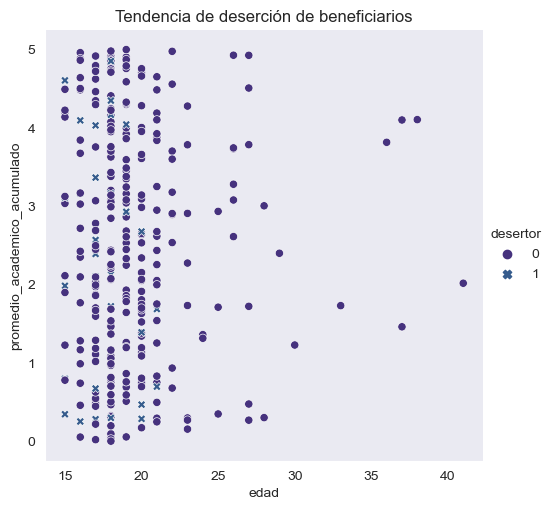

In [9]:
plot_disp(data, col1='edad', col2='promedio_academico_acumulado')

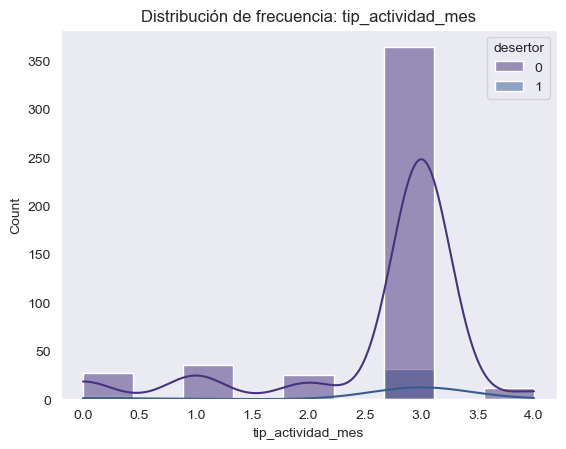

Registros atipicos de las edades de los beneficiarios con respecto a la deserción:
0    441
1      1
Name: desertor, dtype: int64


,id,estado,cod_comuna,nom_corregimiento,nom_vereda,nom_barrio,estrato,tip_ocupa_vivienda,sexo_persona,edad,tip_estado_civil,ind_discap_ninguna,tip_seg_social,niv_educativo,tip_actividad_mes,vlr_ingr_salario,antiguedad,promedio_academico_acumulado,desertor
15,571039545540,2,3,SIN CORREGIMIENTO,SIN VEREDA,CAMPO VALDES NO. 2,2,1,2,28,1,1,3,4,4,0,NUEVO,NaN,0
25,571017347102,2,8,SIN CORREGIMIENTO,SIN VEREDA,EL PINAL,2,1,2,28,1,1,3,4,4,0,NUEVO,NaN,0
28,571152865354,2,6,SIN CORREGIMIENTO,SIN VEREDA,PICACHITO,1,3,2,27,2,1,1,4,3,0,ANTIGUO,1.513014,0
38,571036091931,2,2,SIN CORREGIMIENTO,SIN VEREDA,ANDALUCIA,1,3,2,27,5,1,3,4,3,0,NUEVO,NaN,0
41,571152433172,2,8,SIN CORREGIMIENTO,SIN VEREDA,BUENOS AIRES,2,3,2,33,5,1,1,5,4,0,NUEVO,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,571154982729,2,7,SIN CORREGIMIENTO,SIN VEREDA,BARRIO_S4,3,1,2,36,4,1,3,4,1,0,ANTIGUO,1.034014,0
5428,571247901271,2,2,SIN CORREGIMIENTO,SIN VEREDA,LA FRANCIA,2,1,2,26,1,1,0,4,3,0,ANTIGUO,2.612682,0
5437,5741257531,2,15,SIN CORREGIMIENTO,SIN VEREDA,CRISTO REY,3,1,1,36,2,1,1,4,1,2200000,ANTIGUO,4.034491,0
5467,571068846028,2,2,SIN CORREGIMIENTO,SIN VEREDA,PLAYON DE LOS COMUNEROS,2,1,2,25,5,1,1,4,1,1100000,ANTIGUO,3.233697,0


In [10]:
plot_hist(data, col='tip_actividad_mes')
IQR(data, 'edad')

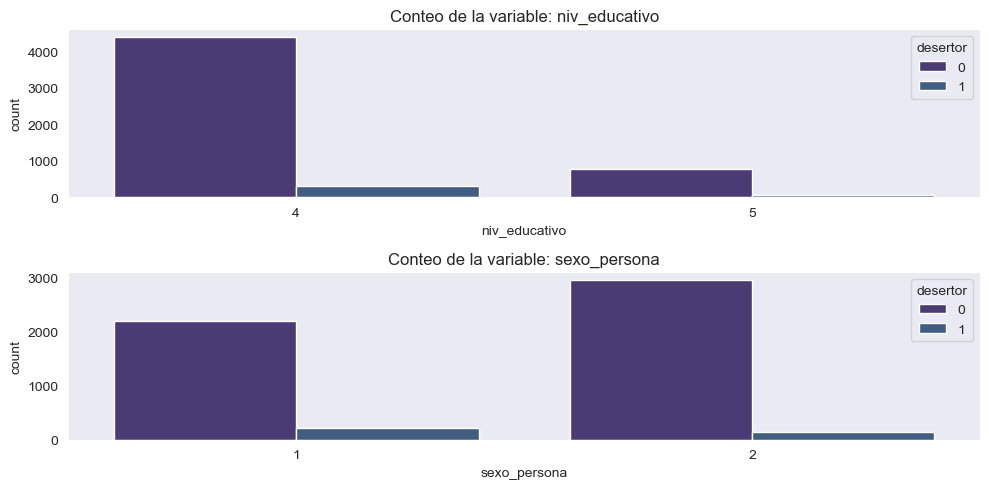

Elementos de niv_educativo
Cantidad de elementos 4 que desertaron: 313
Cantidad de elementos 5 que desertaron: 51

Elementos de sexo_persona
Cantidad de elementos 1 que desertaron: 223
Cantidad de elementos 2 que desertaron: 141


In [11]:
def count_var(data, col1, col2):
    fig, axes = plt.subplots(2,1, figsize=(10, 5))
    
    sns.countplot(data=data, x=col1, hue='desertor', ax=axes[0])
    axes[0].set_xlabel(f'{col1}')
    axes[0].set_title(f'Conteo de la variable: {col1}')
    
    sns.countplot(data=data, x=col2, hue='desertor', ax=axes[1])
    axes[1].set_xlabel(f'{col2}')
    axes[1].set_title(f'Conteo de la variable: {col2}')
    
    plt.tight_layout()
    plt.show()
    
    elemento = data[col1].unique()
    print(f"Elementos de {col1}")
    for elem in elemento:
        desertor_count = data[data[col1] == elem]['desertor'].value_counts().get(1, 0)
        print(f"Cantidad de elementos {elem} que desertaron: {desertor_count}")

        
    elemento = data[col2].unique()
    print(f"\nElementos de {col2}")
    for elem in elemento:
        desertor_count = data[data[col2] == elem]['desertor'].value_counts().get(1, 0)
        print(f"Cantidad de elementos {elem} que desertaron: {desertor_count}")


count_var(data, 'niv_educativo', 'sexo_persona')

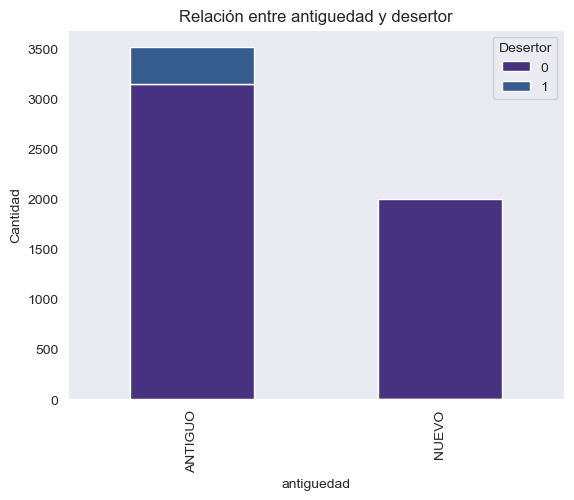

Coeficiente V de Cramér: 0.19993862801373716


In [12]:
def relation_anti_desertor(data):
    counts = data.groupby(['antiguedad', 'desertor']).size().unstack()

    # Crear el gráfico de barras apiladas
    counts.plot(kind='bar', stacked=True)
    plt.xlabel('antiguedad')
    plt.ylabel('Cantidad')
    plt.title('Relación entre antiguedad y desertor')
    plt.legend(title='Desertor', loc='upper right')
    plt.show()
    
    contingency_table = pd.crosstab(data['antiguedad'], data['desertor'])
    # Calcular el coeficiente V de Cramér
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi_c = np.sqrt(chi2 / (n * min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)))

    # Imprimir el coeficiente V de Cramér
    print(f"Coeficiente V de Cramér: {phi_c}")
    
relation_anti_desertor(data)

# Estructurar datos para modelo de predicción

De acuerdo a EDA, se considaras las variables más adecuadas para el modelo de desercion en programas de Sapiencia

## Limpiar conjunto de datos y normalizar

In [13]:
def transform_data(data):
    columns = ['id', 'cod_comuna', 'nom_corregimiento', 'nom_vereda', 'nom_barrio']
    data = data.drop(columns=columns)
    outliers = IQR(data, 'edad')
    data = data = data.drop(outliers.index)
    # Mapeo para la categoria antiguedad lo puedo hacer con one-hot o binario
#     df['antiguedad'] = df['antiguedad'].map({'NUEVO': 1, 'ANTIGUO': 0})
    data = pd.get_dummies(data, columns=['antiguedad'], prefix=['antiguedad'])
    return data

new_data = transform_data(data)

Registros atipicos de las edades de los beneficiarios con respecto a la deserción:
0    441
1      1
Name: desertor, dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler

def normalizar_data(new_data):
    # Supongamos que tienes un dataframe llamado "df" con columnas numéricas y categóricas
    numeric_columns = ['estrato', 'tip_ocupa_vivienda', 'sexo_persona', 'edad', 'tip_estado_civil', 'ind_discap_ninguna',
                      'tip_seg_social', 'niv_educativo', 'tip_actividad_mes', 'vlr_ingr_salario',
                       'promedio_academico_acumulado']

    # Separar las variables numéricas
    numeric_data = new_data[numeric_columns]

    # Aplicar StandardScaler solo a las variables numéricas
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Crear un nuevo dataframe con las variables numéricas estandarizadas y las variables categóricas sin cambios
    data_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)
    
    return data_scaled


def concat_numeric_to_categoric():
    data_scaled = normalizar_data(new_data)
    data_scaled = data_scaled.reset_index()
    
    categorical_data = new_data[['estado', 'antiguedad_ANTIGUO', 'antiguedad_NUEVO', 'desertor']]
    categorical_data = categorical_data.reset_index()
    
    df_concat = pd.concat([data_scaled, categorical_data], axis=1)
    df_concat = df_concat.drop(columns='index')
    
    return df_concat

In [15]:
df_concat = concat_numeric_to_categoric()
df_concat.head()

,estrato,tip_ocupa_vivienda,sexo_persona,edad,tip_estado_civil,ind_discap_ninguna,tip_seg_social,niv_educativo,tip_actividad_mes,vlr_ingr_salario,promedio_academico_acumulado,estado,antiguedad_ANTIGUO,antiguedad_NUEVO,desertor
0,-0.329529,-1.114899,-1.110271,1.675304,0.117319,-0.164199,-0.518985,-0.401407,-2.156018,4.186676,0.295863,1,1,0,1
1,-0.329529,0.554155,-1.110271,2.162256,0.117319,-0.164199,0.871380,-0.401407,0.320995,-0.167882,NaN,2,0,1,0
2,-1.527088,-0.280372,0.900681,-1.246409,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,0.298012,2,1,0,0
3,-0.329529,0.554155,-1.110271,-1.246409,0.117319,-0.164199,0.871380,-0.401407,0.320995,-0.167882,-0.156900,2,1,0,0
4,-0.329529,-1.114899,-1.110271,-1.246409,0.117319,-0.164199,-0.518985,2.491236,0.320995,-0.167882,NaN,2,0,1,0


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def inputar_promedio(df_concat):
    # Crear un nuevo DataFrame solo con las columnas relevantes para la imputación y el modelo
    imputation_data = df_concat[['estrato', 'tip_ocupa_vivienda', 'sexo_persona', 'edad', 'tip_estado_civil', 'ind_discap_ninguna', 
                            'tip_seg_social', 'niv_educativo', 'tip_actividad_mes', 'vlr_ingr_salario', 
                            'promedio_academico_acumulado', 'estado', 'desertor']]

    # Dividir el conjunto de datos en dos grupos: con valores conocidos y con valores faltantes del promedio
    imputation_data_known = imputation_data[imputation_data['promedio_academico_acumulado'].notna()]
    imputation_data_unknown = imputation_data[imputation_data['promedio_academico_acumulado'].isna()]

    # Separar las variables predictoras y la variable objetivo en los dos grupos
    X_known = imputation_data_known.drop('promedio_academico_acumulado', axis=1)
    y_known = imputation_data_known['promedio_academico_acumulado']
    X_unknown = imputation_data_unknown.drop('promedio_academico_acumulado', axis=1)

    # Crear y ajustar el modelo de regresión
    model = LinearRegression()
    model.fit(X_known, y_known)

    # Realizar la imputación de los valores faltantes utilizando el modelo entrenado
    imputed_values = model.predict(X_unknown)

    # Asignar los valores imputados al conjunto de datos
    df_concat.loc[df_concat['promedio_academico_acumulado'].isna(), 'promedio_academico_acumulado'] = imputed_values

In [17]:
inputar_promedio(df_concat)

In [18]:
df_concat

,estrato,tip_ocupa_vivienda,sexo_persona,edad,tip_estado_civil,ind_discap_ninguna,tip_seg_social,niv_educativo,tip_actividad_mes,vlr_ingr_salario,promedio_academico_acumulado,estado,antiguedad_ANTIGUO,antiguedad_NUEVO,desertor
0,-0.329529,-1.114899,-1.110271,1.675304,0.117319,-0.164199,-0.518985,-0.401407,-2.156018,4.186676,0.295863,1,1,0,1
1,-0.329529,0.554155,-1.110271,2.162256,0.117319,-0.164199,0.871380,-0.401407,0.320995,-0.167882,-0.070672,2,0,1,0
2,-1.527088,-0.280372,0.900681,-1.246409,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,0.298012,2,1,0,0
3,-0.329529,0.554155,-1.110271,-1.246409,0.117319,-0.164199,0.871380,-0.401407,0.320995,-0.167882,-0.156900,2,1,0,0
4,-0.329529,-1.114899,-1.110271,-1.246409,0.117319,-0.164199,-0.518985,2.491236,0.320995,-0.167882,0.005105,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,-1.527088,-1.114899,0.900681,0.214447,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,-0.081670,2,0,1,0
5062,0.868029,-1.114899,0.900681,-0.272505,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,-1.660808,2,1,0,0
5063,2.065587,0.554155,0.900681,0.701399,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,0.561285,2,1,0,0
5064,2.065587,0.554155,0.900681,0.214447,0.117319,-0.164199,-0.518985,-0.401407,0.320995,-0.167882,0.425163,2,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_concat.drop('desertor', axis=1)
y = df_concat['desertor']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: {:.2f}%'.format(accuracy * 100))

Precisión del modelo: 99.90%


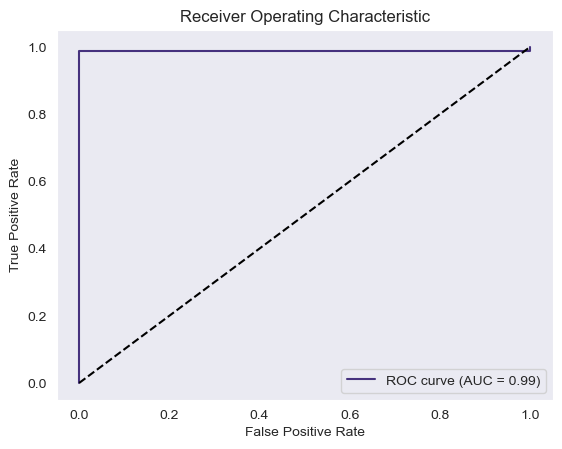

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo inicial
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtener las predicciones de probabilidad para los datos de prueba
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador (en este caso, utilizaremos RandomForestClassifier)
classifier = RandomForestClassifier()

# Entrenar el clasificador
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador:", accuracy)


Precisión del clasificador: 0.9990138067061144


In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador SVM
clf = svm.SVC()

# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 99.41%
